In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
file_path = "/Users/giacomomaritano/Desktop/web_service_dataset.csv"
df_original = pd.read_csv(file_path)

df_original

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,...,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,category,web_service
0,192.168.121.1,67,172.16.255.185,67,UDP,22,7620,328,394,346.363636,...,2.000000,1.555955e+09,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,Network,DHCP
1,192.168.121.1,67,172.16.255.186,67,UDP,17,5670,328,354,333.529412,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP
2,192.168.121.1,67,172.16.255.185,67,UDP,43,15124,328,394,351.720930,...,1.332347,1.555964e+09,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,Network,DHCP
3,192.168.121.1,67,172.16.255.186,67,UDP,30,10086,328,352,336.200000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP
4,192.168.121.1,0,10.130.1.166,0,ICMP,1,56,56,56,56.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,192.168.128.252,137,172.16.255.186,137,UDP,9,702,78,78,78.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704835,192.168.128.252,138,172.16.255.185,138,UDP,3,687,229,229,229.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704836,192.168.128.252,138,172.16.255.186,138,UDP,3,687,229,229,229.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704837,192.168.128.252,49879,108.177.11.188,5228,TCP,75,3520,40,66,46.933333,...,4.228907,1.559770e+09,1.559771e+09,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,Web,Google


Number of unique categories: 24
Number of unique web services: 141
Number of unique links: 2344392


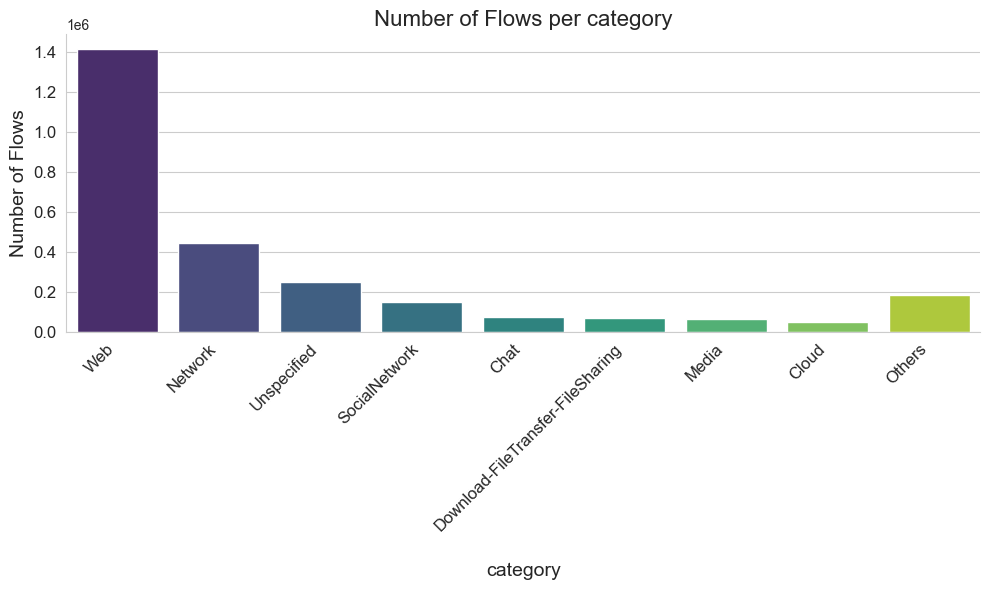

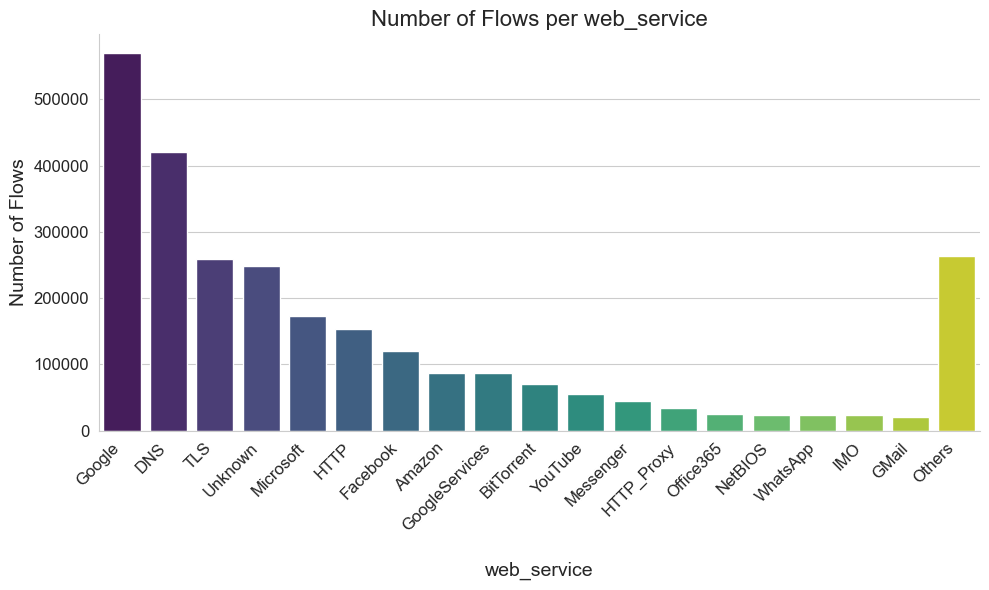

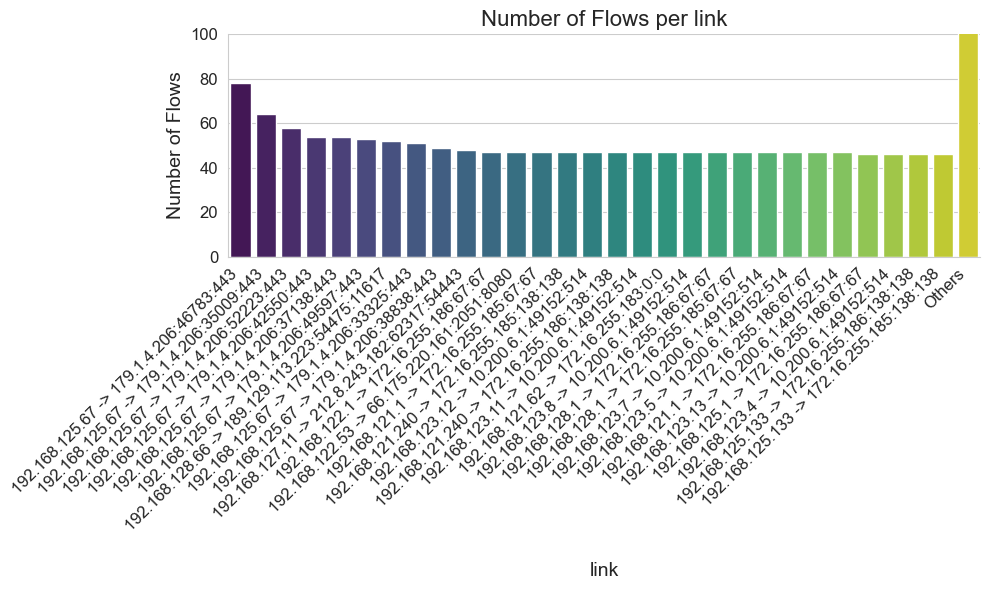

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 1.1
unique_categories = df_original['category'].nunique()
unique_web_services = df_original['web_service'].nunique()

df_original['link'] = df_original['src_ip'] + ' -> ' + df_original['dst_ip'] + ':' + df_original['src_port'].astype(
    str) + ':' + df_original['dst_port'].astype(str)
unique_links = df_original['link'].nunique()

print(f"Number of unique categories: {unique_categories}")
print(f"Number of unique web services: {unique_web_services}")
print(f"Number of unique links: {unique_links}")

df_categories = ['category', 'web_service', 'link']
threshold = [50000, 20000, 45]

# For each of the three entities, draw a bar plot indicating the number of flows belong to a class
# for a certain entity. If there are some targets (e.g., a certain web service) that have
# too few samples, group them as “others”

for index, elem in enumerate(df_categories):
    flow_by_elem = df_original.groupby(elem)[df_categories[index]]
    flow_count = flow_by_elem.count()
    flow_by_count = flow_count.sort_values(ascending=False)
    count_other = flow_by_count[flow_by_count.values < threshold[index]].sum()
    other_row = pd.Series(count_other, index=['Others'])
    flow_by_count = flow_by_count[flow_by_count > threshold[index]]
    flow_by_count = pd.concat([flow_by_count, other_row])

    # small_values = flow_by_elem[flow_by_elem.size() < df_threshold[index]].sum()
    # group_counts = flow_by_elem.size()
    # flow_by_elem = flow_by_elem[flow_by_elem.size() >= df_threshold[index]]
    #
    # if small_values > 0:
    #     flow_by_elem["Others"] = small_values

    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=flow_by_count.index, y=flow_by_count.values, hue=flow_by_count.index, palette='viridis', legend=False)
    plt.title(f'Number of Flows per {elem}', fontsize=16)
    plt.xlabel(f'{elem}', fontsize=14, labelpad=20)
    plt.ylabel("Number of Flows", fontsize=14)
    if elem == 'link':
        plt.ylim(0, 100)  # Set y-axis limit for 'link'
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()
    plt.tight_layout()
    plt.show()

In [25]:
# 1.2
from sklearn.preprocessing import LabelEncoder

# How many unique protocols are there in the dataset?
unique_proto = df_original['proto'].unique()

print(f"Number of unique proto: {len(unique_proto)}")

# Convert such a categorical feature into a numerical one through one-hot encoding.
df_numerical = pd.get_dummies(df_original, columns=['proto'], dtype=int)

# Convert string labels (category and web service) into numerical classes.

unique_web_services = df_original['web_service'].unique()
unique_categories = df_original['category'].unique()
print(f"Number of unique web services: {len(unique_web_services)}")
print(f"Number of unique categories: {len(unique_categories)}")
df_numerical['category'], category_label = pd.factorize(df_original['category'])
df_numerical['web_service'], web_service_label = pd.factorize(df_original['web_service'])
print(f"categories labels")
print(dict(enumerate(category_label)))
print(f"web services labels")
print(dict(enumerate(web_service_label)))

df_numerical

Number of unique proto: 3
Number of unique web services: 141
Number of unique categories: 24
categories labels
{0: 'Network', 1: 'Web', 2: 'SoftwareUpdate', 3: 'Unspecified', 4: 'RPC', 5: 'System', 6: 'Cloud', 7: 'Email', 8: 'Media', 9: 'Streaming', 10: 'VoIP', 11: 'Collaborative', 12: 'Music', 13: 'SocialNetwork', 14: 'Video', 15: 'Download-FileTransfer-FileSharing', 16: 'Chat', 17: 'VPN', 18: 'RemoteAccess', 19: 'Game', 20: 'Database', 21: 'Mining', 22: 'Shopping', 23: 'DataTransfer'}
web services labels
{0: 'DHCP', 1: 'ICMP', 2: 'HTTP', 3: 'Microsoft', 4: 'WindowsUpdate', 5: 'Unknown', 6: 'DNS', 7: 'RX', 8: 'TLS', 9: 'NetBIOS', 10: 'GoogleServices', 11: 'Amazon', 12: 'MSN', 13: 'Yahoo', 14: 'MS_OneDrive', 15: 'Google', 16: 'Dropbox', 17: 'GMail', 18: 'UbuntuONE', 19: 'GoogleDrive', 20: 'YouTube', 21: 'HTTP_Proxy', 22: 'NTP', 23: 'Apple', 24: 'AppleiTunes', 25: 'AppleStore', 26: 'ApplePush', 27: 'AppleiCloud', 28: 'IMAPS', 29: 'IMO', 30: 'Office365', 31: 'Skype', 32: 'Cloudflare', 33

,src_ip,src_port,dst_ip,dst_port,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,category,web_service,link,proto_ICMP,proto_TCP,proto_UDP
0,192.168.121.1,67,172.16.255.185,67,22,7620,328,394,346.363636,25.010081,...,1.035380e-02,198.657965,51.689181,84.916348,0,0,192.168.121.1 -> 172.16.255.185:67:67,0,0,1
1,192.168.121.1,67,172.16.255.186,67,17,5670,328,354,333.529412,9.140200,...,0.000000e+00,0.000000,0.000000,0.000000,0,0,192.168.121.1 -> 172.16.255.186:67:67,0,0,1
2,192.168.121.1,67,172.16.255.185,67,43,15124,328,394,351.720930,26.098495,...,2.233195e-02,340.268454,89.927588,124.270745,0,0,192.168.121.1 -> 172.16.255.185:67:67,0,0,1
3,192.168.121.1,67,172.16.255.186,67,30,10086,328,352,336.200000,10.057833,...,0.000000e+00,0.000000,0.000000,0.000000,0,0,192.168.121.1 -> 172.16.255.186:67:67,0,0,1
4,192.168.121.1,0,10.130.1.166,0,1,56,56,56,56.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0,1,192.168.121.1 -> 10.130.1.166:0:0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,192.168.128.252,137,172.16.255.186,137,9,702,78,78,78.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,5,9,192.168.128.252 -> 172.16.255.186:137:137,0,0,1
2704835,192.168.128.252,138,172.16.255.185,138,3,687,229,229,229.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,5,9,192.168.128.252 -> 172.16.255.185:138:138,0,0,1
2704836,192.168.128.252,138,172.16.255.186,138,3,687,229,229,229.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,5,9,192.168.128.252 -> 172.16.255.186:138:138,0,0,1
2704837,192.168.128.252,49879,108.177.11.188,5228,75,3520,40,66,46.933333,6.685972,...,1.150203e-02,90.155711,44.999017,14.822745,1,15,192.168.128.252 -> 108.177.11.188:49879:5228,0,1,0


In [16]:
df_original

Number of unique proto: 3
Number of unique web services: 141
{0: 'Network', 1: 'Web', 2: 'SoftwareUpdate', 3: 'Unspecified', 4: 'RPC', 5: 'System', 6: 'Cloud', 7: 'Email', 8: 'Media', 9: 'Streaming', 10: 'VoIP', 11: 'Collaborative', 12: 'Music', 13: 'SocialNetwork', 14: 'Video', 15: 'Download-FileTransfer-FileSharing', 16: 'Chat', 17: 'VPN', 18: 'RemoteAccess', 19: 'Game', 20: 'Database', 21: 'Mining', 22: 'Shopping', 23: 'DataTransfer'}
{0: 'DHCP', 1: 'ICMP', 2: 'HTTP', 3: 'Microsoft', 4: 'WindowsUpdate', 5: 'Unknown', 6: 'DNS', 7: 'RX', 8: 'TLS', 9: 'NetBIOS', 10: 'GoogleServices', 11: 'Amazon', 12: 'MSN', 13: 'Yahoo', 14: 'MS_OneDrive', 15: 'Google', 16: 'Dropbox', 17: 'GMail', 18: 'UbuntuONE', 19: 'GoogleDrive', 20: 'YouTube', 21: 'HTTP_Proxy', 22: 'NTP', 23: 'Apple', 24: 'AppleiTunes', 25: 'AppleStore', 26: 'ApplePush', 27: 'AppleiCloud', 28: 'IMAPS', 29: 'IMO', 30: 'Office365', 31: 'Skype', 32: 'Cloudflare', 33: 'Spotify', 34: 'LDAP', 35: 'Twitter', 36: 'Facebook', 37: 'LinkedIn'

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,category,web_service,link
0,192.168.121.1,67,172.16.255.185,67,UDP,22,7620,328,394,346.363636,...,1.555955e+09,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,Network,DHCP,192.168.121.1 -> 172.16.255.185:67:67
1,192.168.121.1,67,172.16.255.186,67,UDP,17,5670,328,354,333.529412,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP,192.168.121.1 -> 172.16.255.186:67:67
2,192.168.121.1,67,172.16.255.185,67,UDP,43,15124,328,394,351.720930,...,1.555964e+09,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,Network,DHCP,192.168.121.1 -> 172.16.255.185:67:67
3,192.168.121.1,67,172.16.255.186,67,UDP,30,10086,328,352,336.200000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP,192.168.121.1 -> 172.16.255.186:67:67
4,192.168.121.1,0,10.130.1.166,0,ICMP,1,56,56,56,56.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,ICMP,192.168.121.1 -> 10.130.1.166:0:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,192.168.128.252,137,172.16.255.186,137,UDP,9,702,78,78,78.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS,192.168.128.252 -> 172.16.255.186:137:137
2704835,192.168.128.252,138,172.16.255.185,138,UDP,3,687,229,229,229.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS,192.168.128.252 -> 172.16.255.185:138:138
2704836,192.168.128.252,138,172.16.255.186,138,UDP,3,687,229,229,229.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS,192.168.128.252 -> 172.16.255.186:138:138
2704837,192.168.128.252,49879,108.177.11.188,5228,TCP,75,3520,40,66,46.933333,...,1.559770e+09,1.559771e+09,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,Web,Google,192.168.128.252 -> 108.177.11.188:49879:5228


In [18]:
# 1.3

# Do you find features that only have a constant value?

numeric_df = df_original.select_dtypes(include=['number'])
constant_features = [col for col in numeric_df if numeric_df[col].var() == 0] #find columns with variance 0

print(f"Constant features: {constant_features}")

if len(constant_features) > 0:
    numeric_df = numeric_df.drop(columns=constant_features) #drop columns with variance 0

# Do you find features that have low variance? If yes, do you think whether we should remove them or not?

column_variances = numeric_df.var()
print("Variance of numeric features:")
print(column_variances)

mean_variance = column_variances.mean()
print("Mean variance of numeric features:")
print(mean_variance)

low_variance_features = [col for col in numeric_df if numeric_df[col].var() < 0.000001 * mean_variance]
high_variance_features = [col for col in numeric_df if numeric_df[col].var() >= 0.000001 * mean_variance]

num_of_low_variance = len(low_variance_features)

num_of_high_variance = len(high_variance_features)

print(f"Low variance features: {num_of_low_variance}")

print(f"High variance features: {num_of_high_variance}")


Constant features: []
Variance of numeric features:
src_port             1.736385e+08
dst_port             8.476540e+07
pktTotalCount        1.447550e+07
octetTotalCount      2.975252e+13
min_ps               3.628413e+03
max_ps               8.639145e+06
avg_ps               1.167117e+05
std_dev_ps           2.869658e+05
flowStart            2.594312e+12
flowEnd              2.594311e+12
flowDuration         3.318399e+04
min_piat             1.078482e+03
max_piat             7.579242e+03
avg_piat             1.507452e+03
std_dev_piat         7.698087e+02
f_pktTotalCount      3.845291e+06
f_octetTotalCount    8.488694e+12
f_min_ps             4.604686e+03
f_max_ps             5.784223e+05
f_avg_ps             4.105634e+04
f_std_dev_ps         4.774176e+04
f_flowStart          2.594312e+12
f_flowEnd            6.004296e+23
f_flowDuration       3.220899e+04
f_min_piat           2.318764e+03
f_max_piat           7.283191e+03
f_avg_piat           2.686449e+03
f_std_dev_piat       5.957556e

In [35]:
#1.4
import random
# Filter web services and categories with enough samples (e.g., >50 rows)
web_service_counts = numeric_df['web_service'].value_counts()
category_counts = numeric_df['category'].value_counts()

valid_web_services = web_service_counts[web_service_counts > 50].index.tolist()
valid_categories = category_counts[category_counts > 50].index.tolist()

# Randomly select 5 web services and categories
selected_web_services = random.sample(valid_web_services, 5)
selected_categories = random.sample(valid_categories, 5)

# Filter dataset for selected web services and categories
web_service_data = numeric_df[numeric_df['web_service'].isin(selected_web_services)]
category_data = numeric_df[numeric_df['category'].isin(selected_categories)]

# Create distribution plots for web services
plt.figure(figsize=(14, 6))
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=web_service_data, x=feature, hue="web_service", fill=True, alpha=0.4, common_norm=False)
    plt.title(f"Distribution of {feature} by Web Services")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title="Web Service")
    plt.show()

# Create distribution plots for categories
plt.figure(figsize=(14, 6))
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=category_data, x=feature, hue="category", fill=True, alpha=0.4, common_norm=False)
    plt.title(f"Distribution of {feature} by Categories")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title="Category")
    plt.show()

KeyError: 'web_service'